In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import the dataset

In [23]:
df = pd.read_csv('data/Cricket_Data_Limited.csv')

## Basic query on the dataset

- Shape of the dataset

In [24]:
df.shape

(2240, 14)

- Info about the dataset

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   home        2240 non-null   object 
 1   away        2240 non-null   object 
 2   1st inn     2240 non-null   object 
 3   wckts       2240 non-null   int64  
 4   winner      2240 non-null   object 
 5   season      2240 non-null   int64  
 6   res         2240 non-null   object 
 7   won by      2240 non-null   object 
 8   venue name  2240 non-null   object 
 9   Straight    2240 non-null   int64  
 10  Square      2240 non-null   int64  
 11  Area        2240 non-null   float64
 12  Pitch       2240 non-null   object 
 13  runs        2240 non-null   int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 245.1+ KB


- Check for any null values

In [26]:
df.isnull().sum()*100/len(df)

home          0.0
away          0.0
1st inn       0.0
wckts         0.0
winner        0.0
season        0.0
res           0.0
won by        0.0
venue name    0.0
Straight      0.0
Square        0.0
Area          0.0
Pitch         0.0
runs          0.0
dtype: float64

## Conclusion
- The dataset has few no null values.

## Describe the dataset

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
wckts,2240.0,5.528571,2.019796,0.00000,4.00000,6.0000,7.00000,10.00000
season,2240.0,2021.757143,1.061715,2020.00000,2021.00000,2022.0000,2023.00000,2023.00000
Straight,2240.0,71.885714,4.750625,65.00000,65.00000,72.0000,75.00000,78.00000
Square,2240.0,73.128571,6.010671,65.00000,68.00000,71.0000,80.00000,80.00000
Area,2240.0,16482.006817,1442.372402,15111.06066,15381.23763,16336.2818,16663.00743,19603.53816
runs,2240.0,184.771429,25.863169,126.00000,167.00000,188.5000,202.00000,257.00000


## Feature selection

In [28]:
categorical_columns = df.select_dtypes(include = 'object').columns
numerical_columns = df.select_dtypes(exclude= 'object').columns

In [29]:
print(f"Categorical Columns before dropping: {categorical_columns}")
print(f"Numerical Columns before dropping: {numerical_columns}")

Categorical Columns before dropping: Index(['home', 'away', '1st inn', 'winner', 'res', 'won by', 'venue name',
       'Pitch'],
      dtype='object')
Numerical Columns before dropping: Index(['wckts', 'season', 'Straight', 'Square', 'Area', 'runs'], dtype='object')


- Dropping irrelevant columns

In [30]:
r = ['home', 'away', '1st inn', 'winner', 'season', 'res', 'won by', 'venue name', 'Straight', 'Square']
df.drop(labels = r, axis = 1, inplace = True)
df.head()

,wckts,Area,Pitch,runs
0,8,19603.53816,bat,193
1,7,19603.53816,bowl,169
2,4,19603.53816,bat,216
3,4,19603.53816,bat,192
4,6,19603.53816,bat,181


In [31]:
categorical_columns = df.select_dtypes(include = 'object').columns
numerical_columns = df.select_dtypes(exclude= 'object').columns

In [47]:
print(f"Categorical Columns after dropping: {categorical_columns}")
print(f"Numerical Columns after dropping: {numerical_columns}")

Categorical Columns after dropping: Index(['Pitch'], dtype='object')
Numerical Columns after dropping: Index(['wckts', 'Area', 'runs'], dtype='object')


## Univariate and Multivariate analysis

- Univariate Analysis

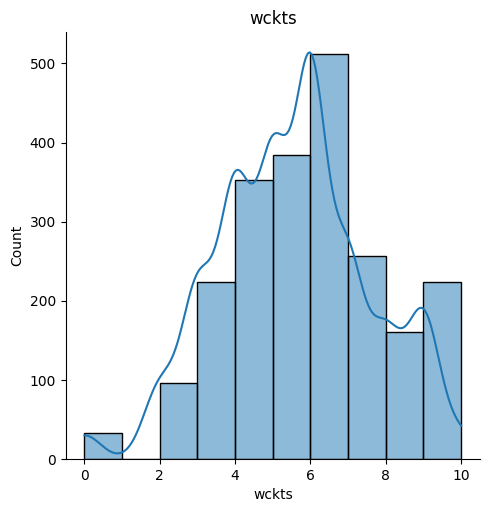

<Figure size 1500x1500 with 0 Axes>

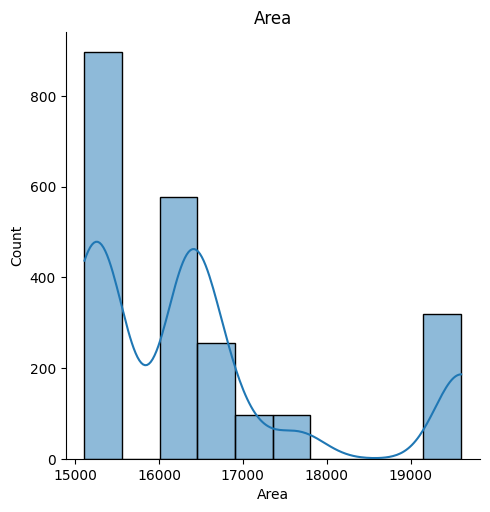

<Figure size 1500x1500 with 0 Axes>

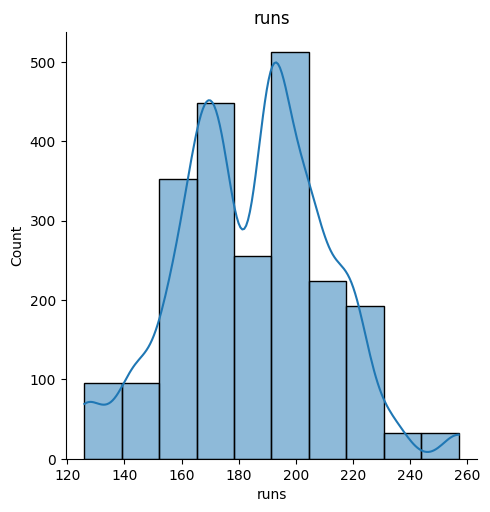

<Figure size 1500x1500 with 0 Axes>

In [33]:
for feature in numerical_columns:
    data=df.copy()
    sns.displot(df[feature], bins = 10, kde = True)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

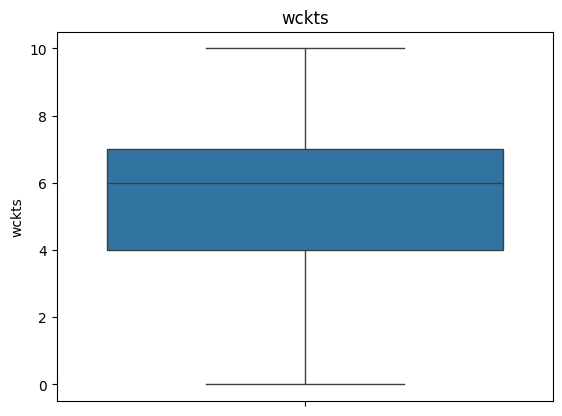

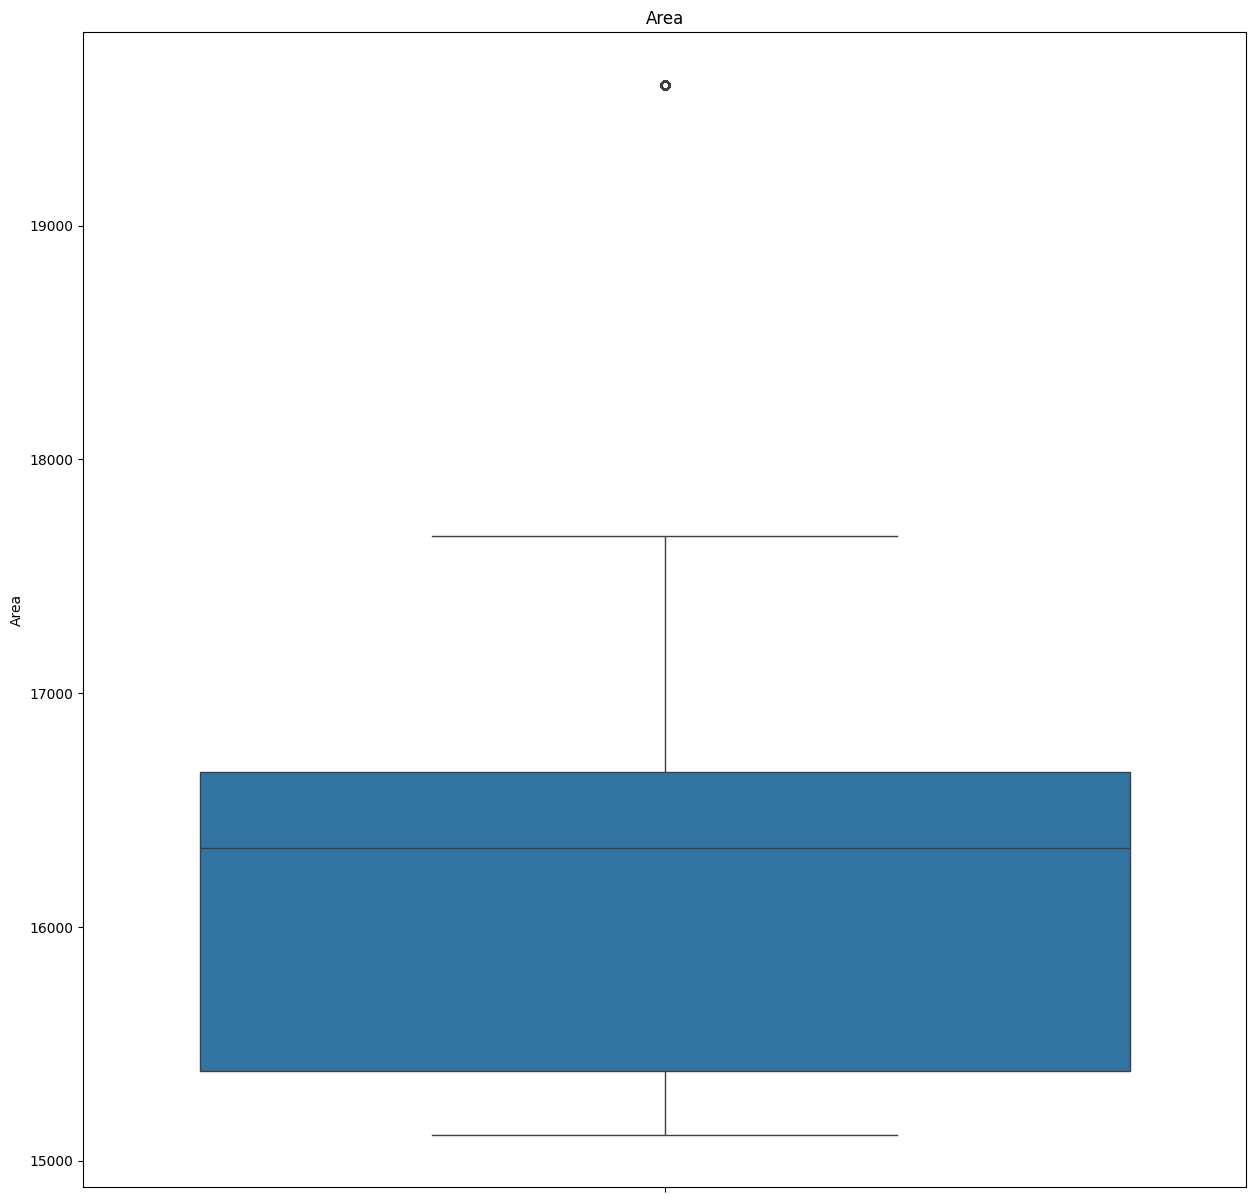

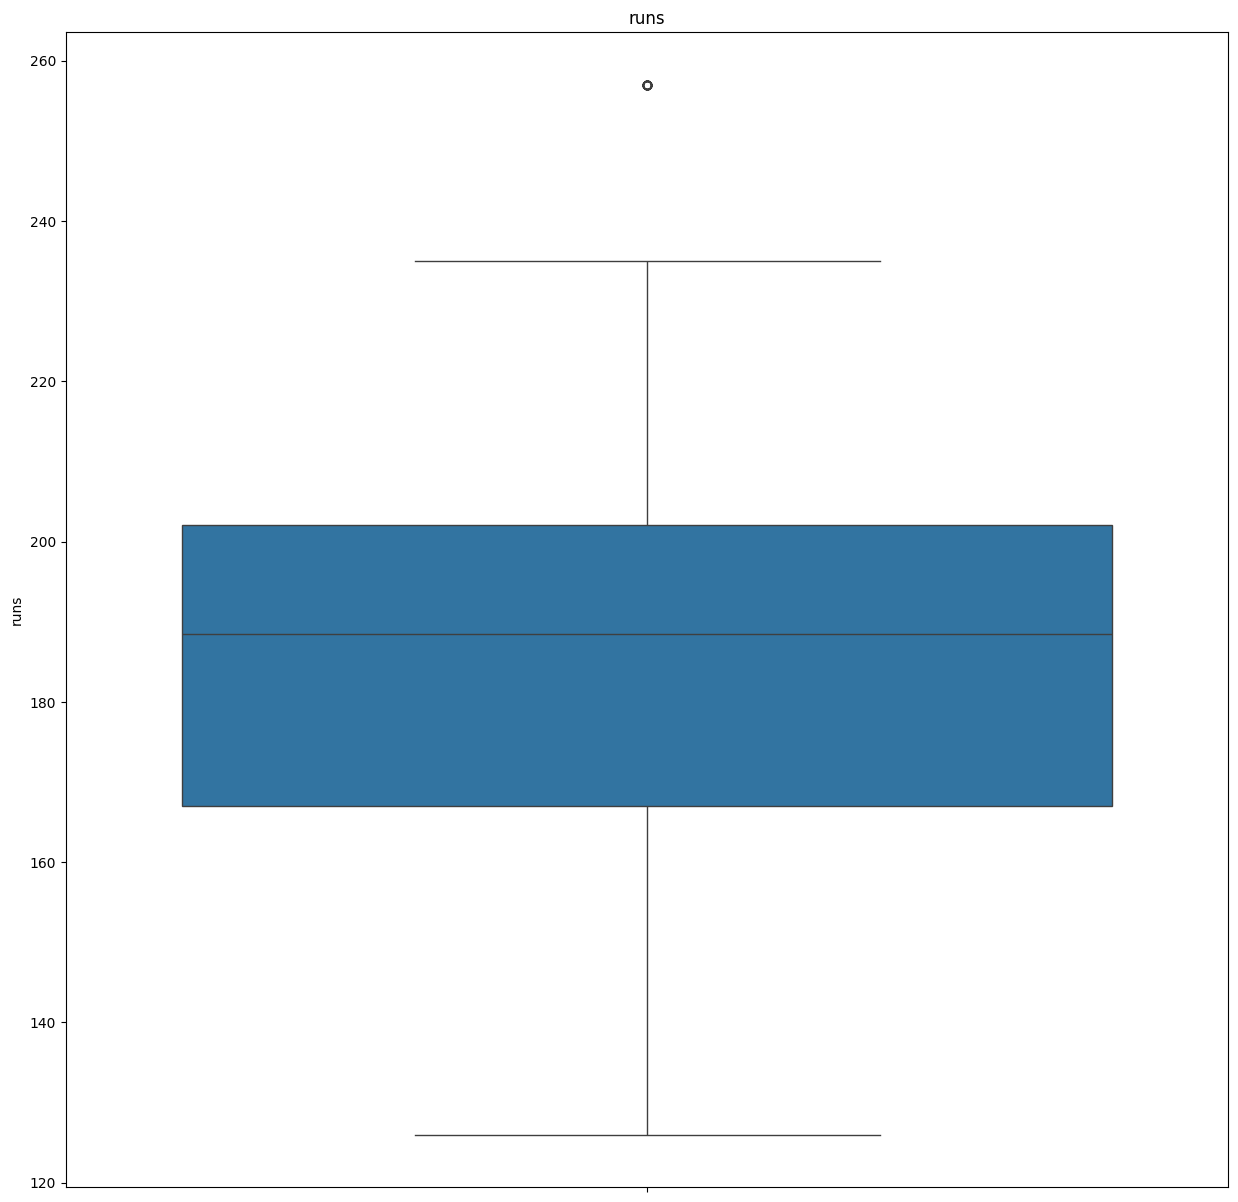

<Figure size 1500x1500 with 0 Axes>

In [34]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in numerical_columns:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

- Multivariate analysis

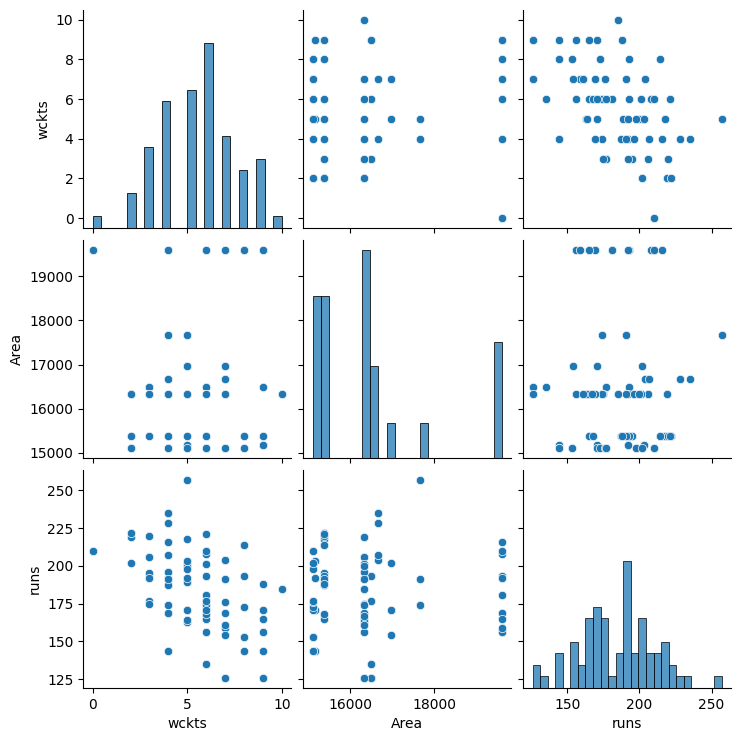

In [35]:
#Pairplot
sns.pairplot(df)
plt.show()

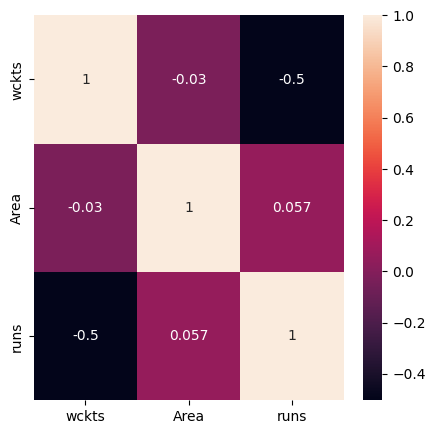

In [36]:
corrmat = df.drop(columns='Pitch', axis=1).corr(method = "spearman")
plt.figure(figsize=(5, 5))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

## Conclusion
- Since we have very less features, we won't remove any features.
- There is an outlier in the wckts and Area column, but again we won't remove them due to less data.

## Building the pipeline

- Importing the libraries

In [37]:
from sklearn.impute import SimpleImputer # Missing values
from sklearn.preprocessing import StandardScaler, MinMaxScaler # Feature scaling
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder # To rank categorical features
from sklearn.model_selection import train_test_split
# Pipeline
from sklearn.pipeline import Pipeline, make_pipeline #To add everything together
from sklearn.compose import ColumnTransformer, make_column_transformer # Combine everything together

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBRegressor

- Splitting into dependent and independent variables

In [38]:
X = df.drop(labels = 'runs', axis=1)
y = df['runs']

- Reassigning the categorical_columns and the numerical_columns variables

In [51]:
categorical_columns = X.select_dtypes(include = 'object').columns
numerical_columns = X.select_dtypes(exclude= 'object').columns

In [52]:
print(f"Categorical columns in X dataset: {categorical_columns}")
print(f"Numerical columns in X dataset: {numerical_columns}")

Categorical columns in X dataset: Index(['Pitch'], dtype='object')
Numerical columns in X dataset: Index(['wckts', 'Area'], dtype='object')


- Splitting the dataset

In [54]:
# Splitting the dataset into training and test set.
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=45)

- Numerical Pipeline

In [40]:
# num_pipeline = Pipeline(
#     steps=[
#         ('imputer', SimpleImputer(strategy='median')),
#         ('scaler', StandardScaler())
#     ]
# )

In [55]:
num_pipeline = make_pipeline(
    SimpleImputer(strategy = "median"), 
    StandardScaler()
    )
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

- Categorical Pipeline

In [42]:
# cat_pipeline = Pipeline(
#                 steps=[
#                     ('imputer', SimpleImputer(strategy='most_frequent')),
#                     ('onehotencoder', OneHotEncoder(drop='first'))
#                 ]
#             )

In [56]:
cat_pipeline = make_pipeline(
    SimpleImputer(strategy = "most_frequent"), 
    OneHotEncoder(drop = 'first'))
cat_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder', OneHotEncoder(drop='first'))])

- Combining the numerical and categprical pipeline

In [44]:
# preprocessor = ColumnTransformer([
#     ('num_pipeline', num_pipeline, numerical_columns),
#     ('cat_pipeline', cat_pipeline, categorical_columns)
# ], remainder = 'passthrough')

In [57]:
preprocessor = make_column_transformer(
    (num_pipeline, numerical_columns), 
    (cat_pipeline, categorical_columns), 
    remainder = 'passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['wckts', 'Area'], dtype='object')),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first'))]),
                                 Index(['Pitch'], dtype='object'))])

- Fit-Transform and Fit

In [58]:
X_train = pd.DataFrame(preprocessor.fit_transform(X_train), columns=preprocessor.get_feature_names_out())
X_test = pd.DataFrame(preprocessor.transform(X_test), columns = preprocessor.get_feature_names_out())

## Building and testing our models

- Defining our evaluation function

In [59]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

- Fitting the Train dataset into our model and predicting.

In [62]:
from sklearn import metrics
models = {
    "Linear Regression": LinearRegression(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor()
}

params={
    "Linear Regression":{},

    "K-Neighbors Regressor":{
              'n_neighbors': [2,3,4,5,6],
              'weights': ['uniform','distance']

    },

    # learning_rate=0.05, max_depth=7, n_estimators=128 86.01

    "GradientBoostingRegressor":{
                    'max_depth' : [6, 7, 8, 9, 10],
                    'loss':['squared_error'],
                    'learning_rate':[.2, .05, .1],
                    'criterion':[ 'friedman_mse', 'squared_error'],
                    'max_features':['sqrt', 'log2'],
                    'n_estimators': [32,64,128,256],
                    'subsample':[0.6, 0.65, 0.7]
                },

    "Decision Tree": {
                    'max_features':['sqrt']
                },

    "Random Forest Regressor":{
                    # 'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                    # 'max_features':['sqrt','log2',None],
                    # 'n_estimators': [8,16,32,64,128,256],
                    # 'max_depth': [3, 6, 9],
                    # 'max_leaf_nodes': [3, 6, 9]
                },

    "XGBRegressor":{
                    'learning_rate':[.1,.01,.05,.001],
                    'n_estimators': [8,16,32,64,128,256]
                }
}

model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]

    para=params[list(models.keys())[i]]
    gs = GridSearchCV(model,para,cv=3)
    gs.fit(X_train,y_train)
    print(gs.best_estimator_)
    model.set_params(**gs.best_params_)

    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    # print(metrics.accuracy_score(y_train, y_train_pred))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    # print(model.score(y_test, y_test_pred))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

LinearRegression()
Linear Regression
Model performance for Training set
- Root Mean Squared Error: 14.0992
- Mean Absolute Error: 10.8281
- R2 Score: 0.7051
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 14.0404
- Mean Absolute Error: 10.7106
- R2 Score: 0.6969


KNeighborsRegressor(n_neighbors=6)
K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 9.9087
- Mean Absolute Error: 6.0813
- R2 Score: 0.8544
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 9.8833
- Mean Absolute Error: 6.1179
- R2 Score: 0.8498


GradientBoostingRegressor(max_depth=10, max_features='log2', n_estimators=64,
                          subsample=0.6)
GradientBoostingRegressor
Model performance for Training set
- Root Mean Squared Error: 9.5887
- Mean Absolute Error: 5.9666
- R2 Score: 0.8636
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 9.5389
-

## Conclusion
- We chose R2 score as our Goodness of fit.
- The Random Forest Regressor provided the best R2 score. 
- It scored 86.05% in the test dataset.
 